# Fun Stuff with PyTorch!

- In this notebook, we’ll be going through 4 iterations of the same problem, each using a different approach.

- We’re working with a 3rd-order Taylor polynomial approximation of the function $y = \sin(x)$, which looks like $y \approx a + bx + cx^2 + dx^3$.

- The true coefficients of this approximation are roughly: $a \approx 0$, $b \approx 1$, $c \approx 0$, $d \approx -0.166$

- **Note:** each version will include an animation at the end showing how our model updates the coefficients over time (as it minimizes the loss).

  - And don’t worry about the long code blocks, a big chunk of the code is just for animation. You’ll see comments marking where that part begins and ends.
 


# Hey, don't forget to import our libraries!

In [1]:
import math
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


# random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cpu


## Version 1: Manual Gradients

- Task 1: Initialize our random weights
- Task 2: Implement the forward Pass (Hint: what exactly are we trying to predict?)
- Task 3: Loss Calculation (Hint: what’s the usual way to measure the error between the true value and the predicted value?)
- Task 4: Implement backpropagation (You have to do it manually!)
- Task 5: Update the weights (Hint: these are the ones you initialized back in Task 1)

99 3652.526123046875
199 2449.006591796875
299 1644.1806640625
399 1105.6197509765625
499 744.9889526367188
599 503.3320617675781
699 341.2792053222656
799 232.52435302734375
899 159.4797821044922
999 110.37910461425781
1099 77.34516906738281
1199 55.10100173950195
1299 40.108543395996094
1399 29.99407196044922
1499 23.16407012939453
1599 18.54717445373535
1699 15.423209190368652
1799 13.307208061218262
1899 11.872390747070312
1999 10.898415565490723
Result: y = -0.03227753937244415 + 0.823756217956543 x + 0.005568412598222494 x^2 + -0.08863861113786697 x^3


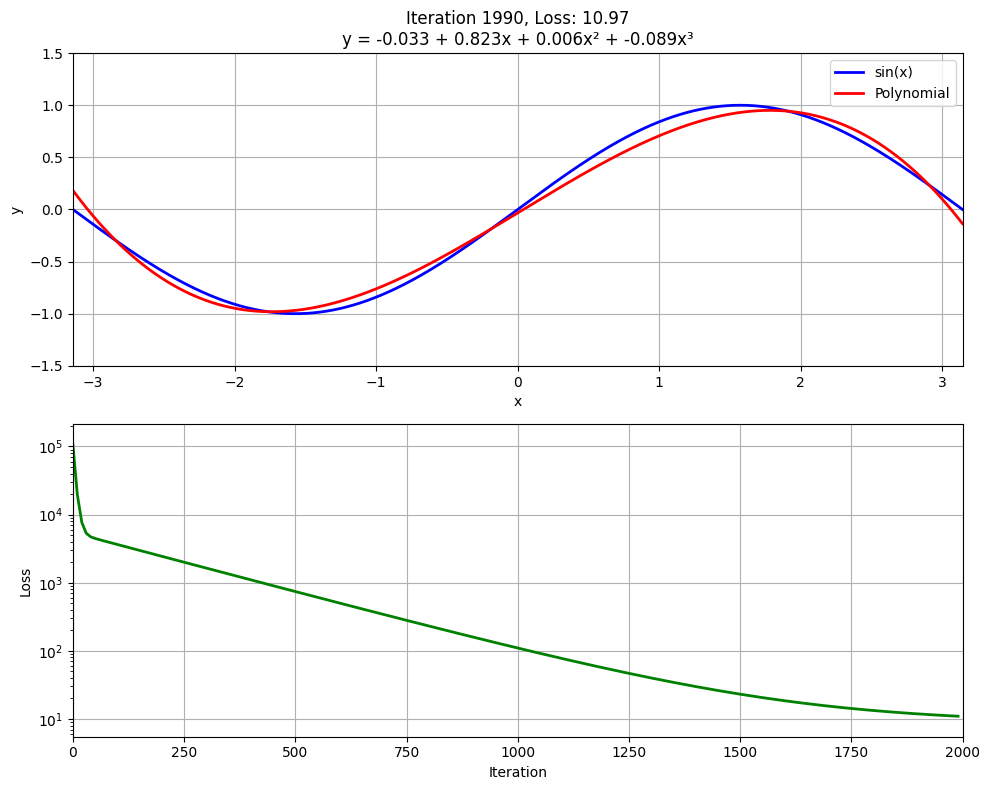

In [ ]:
if __name__ == "__main__":
    # Here we create our input and output data
    x = torch.linspace(-math.pi, math.pi, 2000)
    y = torch.sin(x)


    # --- Your implementation starts here ---
    
    # Task 1 --- BEGIN ---
    a = torch.randn(())
    b = torch.randn(())
    c = torch.randn(())
    d = torch.randn(())
    # Task 1 --- END ---

    # Don't Remove ME! (Store history for animation) --- BEGIN ---
    history = []
    save_every = 10
    # Don't Remove ME! (Store history for animation) --- END ---

    # Here we pick our learning rate
    learning_rate = 1e-6
    
    for t in range(2000):
        
        # Task 2 --- BEGIN ---
        y_prediction = a + b * x + c * x ** 2 + d * x ** 3
        # Task 2 --- END ---


        # Task 3 --- BEGIN ---
        loss = (y_prediction - y).pow(2).sum()
        # Task 3 --- END ---
        
        # Don't Remove ME! (Store history for animation) --- BEGIN ---
        if t % save_every == 0:
            history.append({
                'iteration': t,
                'y_pred': y_prediction.detach().clone(),
                'loss': loss.item(),
                'params': (a.item(), b.item(), c.item(), d.item())
            })

        if t % 100 == 99:
            print(t, loss.item())
        # Don't Remove ME! (Store history for animation) --- END ---

        # Task 4 --- BEGIN ---
        grad_y_prediction = 2.0 * (y_prediction - y)
        grad_a = grad_y_prediction.sum()
        grad_b = (grad_y_prediction * x).sum()
        grad_c = (grad_y_prediction * x ** 2).sum()
        grad_d = (grad_y_prediction * x ** 3).sum()
        # Task 4 --- END ---
        
        # Task 5 --- BEGIN ---
        a -= learning_rate * grad_a
        b -= learning_rate * grad_b
        c -= learning_rate * grad_c
        d -= learning_rate * grad_d
        # Task 5 --- END ---
        
    print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')


    # --- Your implementation ends here ---
    
    
    # --- Animation Part Begins Here ---
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
    
    x_np = x.numpy()
    y_np = y.numpy()
    
    ax1.plot(x_np, y_np, 'b-', label='sin(x)', linewidth=2)
    line_pred, = ax1.plot([], [], 'r-', label='Polynomial', linewidth=2)
    ax1.set_xlim(-math.pi, math.pi)
    ax1.set_ylim(-1.5, 1.5)
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.legend()
    ax1.grid(True)
    title = ax1.set_title('')
    
    loss_line, = ax2.plot([], [], 'g-', linewidth=2)
    ax2.set_xlim(0, 2000)
    
    all_losses = [h['loss'] for h in history]
    min_loss = min(all_losses)
    max_loss = max(all_losses[:10]) if len(all_losses) > 10 else max(all_losses)
    
    if min_loss > 0:
        ax2.set_yscale('log')
        ax2.set_ylim(min_loss * 0.5, max_loss * 2)
    else:
        ax2.set_ylim(0, max_loss * 1.1)
        print("Warning: Loss has non-positive values, using linear scale")
    
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('Loss')
    ax2.grid(True)
    
    iterations_so_far = []
    losses_so_far = []
    
    def init():
        line_pred.set_data([], [])
        loss_line.set_data([], [])
        return line_pred, loss_line, title
    
    def animate(frame):
        h = history[frame]
        
        line_pred.set_data(x_np, h['y_pred'].numpy())
        
        iterations_so_far.append(h['iteration'])
        losses_so_far.append(h['loss'])
        loss_line.set_data(iterations_so_far, losses_so_far)
        
        a_val, b_val, c_val, d_val = h['params']
        title.set_text(f"Iteration {h['iteration']}, Loss: {h['loss']:.2f}\n"
                      f"y = {a_val:.3f} + {b_val:.3f}x + {c_val:.3f}x² + {d_val:.3f}x³")
        
        return line_pred, loss_line, title
    
    anim = FuncAnimation(fig, animate, init_func=init, frames=len(history),
                        interval=50, blit=True, repeat=True)
    
    # Save animation
    anim.save('polynomial_training.gif', writer='pillow', fps=20)

    # --- Animation Part Ends Here ---

    # Show Final plot
    plt.tight_layout()
    plt.show()
    
    

## Version 2: Less manual work (autograd?)

- Task 1: Initialize our random weights (Hint: be careful here, maybe take a quick look at the guidebook)
- Task 2: Implement the forward Pass (Hint: you did this before...)
- Task 3: Loss Calculation (Hint: also something you’ve done before...)
- Task 4: Implement backpropagation (Hint: it’s a bit of work? the guidebook will save you)
- Task 5: Update the weights (Hint: similar to version 1, but don’t forget the actual objective)

99 1113.8482666015625
199 742.3961181640625
299 495.9324951171875
399 332.3629455566406
499 223.78160095214844
599 151.68423461914062
699 103.79875183105469
799 71.98516845703125
899 50.842987060546875
999 36.787559509277344
1099 27.440692901611328
1199 21.22254753112793
1299 17.084331512451172
1399 14.329221725463867
1499 12.494145393371582
1599 11.271297454833984
1699 10.456046104431152
1799 9.912269592285156
1899 9.54936408996582
1999 9.307026863098145
Result: y = -0.009866620413959026 + 0.8762546181678772 x + 0.0017021566163748503 x^2 + -0.09610605239868164 x^3


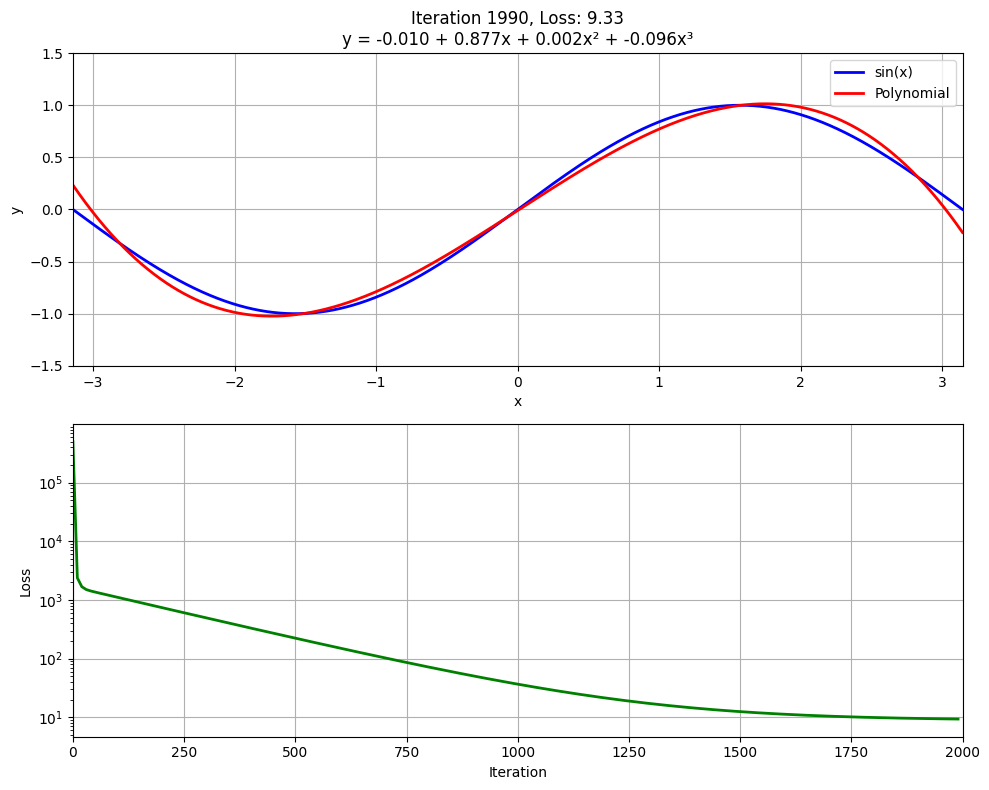

In [ ]:
if __name__ == "__main__":

    # Here we create our input and output data
    x = torch.linspace(-math.pi, math.pi, 2000)
    y = torch.sin(x)

    # --- Your implementation starts here ---

    # Task 1 --- BEGIN ---
    a = torch.randn((), requires_grad=True)
    b = torch.randn((), requires_grad=True)
    c = torch.randn((), requires_grad=True)
    d = torch.randn((), requires_grad=True)
    # Task 1 --- END ---

    # Don't Remove ME! (Store history for animation) --- BEGIN ---
    history = []
    save_every = 10 
    # Don't Remove ME! (Store history for animation) --- END ---

    learning_rate = 1e-6
    for t in range(2000):
        # Task 2 --- BEGIN ---
        y_prediction = a + b * x + c * x ** 2 + d * x ** 3
        # Task 2 --- END ---

        # Task 3 --- BEGIN ---
        loss = (y_prediction - y).pow(2).sum()
        # Task 3 --- END ---
        
        # Don't Remove ME! (Store history for animation) --- BEGIN ---
        if t % save_every == 0:
            history.append({
                'iteration': t,
                'y_pred': y_prediction.detach().clone(),
                'loss': loss.item(),
                'params': (a.item(), b.item(), c.item(), d.item())
            })
        
        if t % 100 == 99:
            print(t, loss.item())
        # Don't Remove ME! (Store history for animation) --- END ---

        # Task 4 --- BEGIN ---
        loss.backward()
        # Task 4 --- END ---
        
        # Task 5 --- BEGIN ---
        with torch.no_grad():
            a -= learning_rate * a.grad
            b -= learning_rate * b.grad
            c -= learning_rate * c.grad
            d -= learning_rate * d.grad

            a.grad = None
            b.grad = None
            c.grad = None
            d.grad = None
        # Task 5 --- END ---
        
    print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')
    
    # --- Your implementation ends here ---

    # --- Animation Part Begins Here ---
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
    
    x_np = x.numpy()
    y_np = y.numpy()
    
    ax1.plot(x_np, y_np, 'b-', label='sin(x)', linewidth=2)
    line_pred, = ax1.plot([], [], 'r-', label='Polynomial', linewidth=2)
    ax1.set_xlim(-math.pi, math.pi)
    ax1.set_ylim(-1.5, 1.5)
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.legend()
    ax1.grid(True)
    title = ax1.set_title('')
    
    loss_line, = ax2.plot([], [], 'g-', linewidth=2)
    ax2.set_xlim(0, 2000)
    
    all_losses = [h['loss'] for h in history]
    min_loss = min(all_losses)
    max_loss = max(all_losses[:10]) if len(all_losses) > 10 else max(all_losses)
    
    if min_loss > 0:
        ax2.set_yscale('log')
        ax2.set_ylim(min_loss * 0.5, max_loss * 2)
    else:
        ax2.set_ylim(0, max_loss * 1.1)
        print("Warning: Loss has non-positive values, using linear scale")
    
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('Loss')
    ax2.grid(True)
    
    iterations_so_far = []
    losses_so_far = []



    def init():
        line_pred.set_data([], [])
        loss_line.set_data([], [])
        return line_pred, loss_line, title
    
    def animate(frame):
        h = history[frame]
        
        line_pred.set_data(x_np, h['y_pred'].numpy())
        
        iterations_so_far.append(h['iteration'])
        losses_so_far.append(h['loss'])
        loss_line.set_data(iterations_so_far, losses_so_far)
        
        a_val, b_val, c_val, d_val = h['params']
        title.set_text(f"Iteration {h['iteration']}, Loss: {h['loss']:.2f}\n"
                      f"y = {a_val:.3f} + {b_val:.3f}x + {c_val:.3f}x² + {d_val:.3f}x³")
        
        return line_pred, loss_line, title
    
    anim = FuncAnimation(fig, animate, init_func=init, frames=len(history),
                        interval=50, blit=True, repeat=True)

    # Save animation
    anim.save('polynomial_training_ver2.gif', writer='pillow', fps=20)
    
    # --- Animation Part Ends Here ---
    
    # Show Final plot        
    plt.tight_layout()
    plt.show()

## Version 3: Let's customize!

- Now we’re introducing another approach for finding our parameters: **Legendre Polynomials**
- We still want to use autograd, but there’s a tiny issue: PyTorch doesn’t support this out of the box
- So our goal is to build a custom autograd function
- Our function is $P_{3}(z) = 0.5 \cdot(5\cdot z^3 - 3\cdot z)$ and it's derivative $P'_3(z) = 1.5 \cdot(5\cdot z^2 -1)$
- Tasks:
    - Task 1: Fix the `forwad` function (Hint: we need to save our input)
    - Task 2: Using the saved input from the forward pass, fix the `backward` function (Hint: what do we usually compute during the backward pass?)
    - Task 3: Implement the forward pass (Hint: the approach changed, which means what we’re predicting also changed)
    - Task 4: Implement the loss (yep... here we go again)
    - Task 5: Implement backpropagation and update your weights (Hint: very similar to version 2)


=== Version 3: Custom Autograd Function ===
Initial parameters: a=0.0000, b=-1.0000, c=0.0000, d=0.3000
Epoch  100, Loss: 209.958344
Epoch  200, Loss: 144.660187
Epoch  300, Loss: 100.702499
Epoch  400, Loss: 71.035194
Epoch  500, Loss: 50.978512
Epoch  600, Loss: 37.403133
Epoch  700, Loss: 28.206867
Epoch  800, Loss: 21.973185
Epoch  900, Loss: 17.745728
Epoch 1000, Loss: 14.877890
Epoch 1100, Loss: 12.931766
Epoch 1200, Loss: 11.610918
Epoch 1300, Loss: 10.714257
Epoch 1400, Loss: 10.105482
Epoch 1500, Loss: 9.692105
Epoch 1600, Loss: 9.411376
Epoch 1700, Loss: 9.220745
Epoch 1800, Loss: 9.091286
Epoch 1900, Loss: 9.003362
Epoch 2000, Loss: 8.943642

Final parameters:
  a = -0.000000
  b = -2.208527
  c = -0.000000
  d = 0.255486
Final model: y = -0.000000 + -2.208527 * P3(-0.000000 + 0.255486 * x)
Final Loss: 8.943642


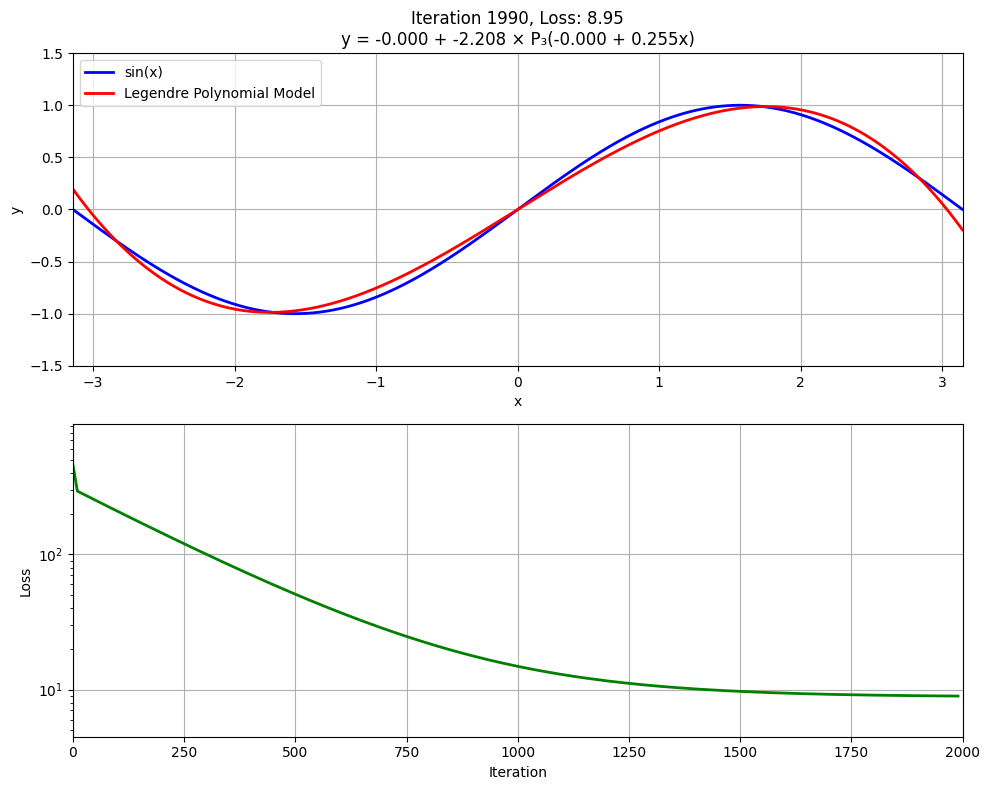

In [ ]:
class LegendrePolynomial3(torch.autograd.Function):
    """
    Custom autograd function for 3rd degree Legendre polynomial
    P3(z) = 0.5 * (5*z^3 - 3*z)
    P3'(z) = 1.5 * (5*z^2 - 1)
    """
    
    @staticmethod
    def forward(ctx, input):
        """
        Forward pass: compute P3(input)
        Save input for backward pass
        """
        # Task 1 --- BEGIN ---
        ctx.save_for_backward(input)
        # Task 1 --- END ---
        return 0.5 * (5 * input ** 3 - 3 * input)
    
    @staticmethod
    def backward(ctx, grad_output):
        """
        Backward pass: compute gradient of P3 with respect to input
        """
        input, = ctx.saved_tensors

        # Task 2 --- BEGIN ---
        grad_input = grad_output * 1.5 * (5 * input ** 2 - 1)
        # Task 2 --- END ---
        return grad_input


def version3_custom_autograd():
    """
    Version 3: Custom autograd function with Legendre polynomial
    Model: y = a + b * P3(c + d * x)
    """
    print("\n=== Version 3")
    
    # Here we create our input and output data
    x = torch.linspace(-math.pi, math.pi, 2000, device=device)
    y_true = torch.sin(x)

    # Don't Remove ME! (Parameters already initialized closer to solution for convergence) --- BEGIN ---
    a = torch.full((), 0.0, device=device, requires_grad=True)
    b = torch.full((), -1.0, device=device, requires_grad=True)
    c = torch.full((), 0.0, device=device, requires_grad=True)
    d = torch.full((), 0.3, device=device, requires_grad=True)
    # Don't Remove ME! (Parameters already initialized closer to solution for convergence) --- END ---
    
    learning_rate = 5e-6  # We adjust our learning rate
    print(f'Initial parameters: a={a.item():.4f}, b={b.item():.4f}, c={c.item():.4f}, d={d.item():.4f}')
    
    # Don't Remove ME! (alias for the custom function) --- BEGIN ---
    P3 = LegendrePolynomial3.apply
    # Don't Remove ME! (alias for the custom function) --- END ---
    
    # Don't Remove ME! (History for animation) --- BEGIN ---
    history = []
    save_every = 10
    # Don't Remove ME! (History for animation) --- END ---
    
    losses = []
    for t in range(2000):
        
        # Task 3 --- BEGIN ---
        y_pred = a + b * P3(c + d * x)
        # Task 3 --- END ---

        # Task 4 --- BEGIN ---
        loss = (y_pred - y_true).pow(2).sum()
        # Task 4 --- END ---

        # Don't Remove ME! (Storing losses for animation) --- BEGIN ---
        losses.append(loss.item())
        # Don't Remove ME! (Storing losses for animation) --- END ---


        # Don't Remove ME! (Store history for animation) --- BEGIN ---
        if t % save_every == 0:
            history.append({
                'iteration': t,
                'y_pred': y_pred.detach().clone(),
                'loss': loss.item(),
                'params': (a.item(), b.item(), c.item(), d.item())
            })
        
        if t % 100 == 99:
            print(f'Epoch {t+1:4d}, Loss: {loss.item():.6f}')
        # Don't Remove ME! (Store history for animation) --- END ---
        
        # Task 5 --- BEGIN ---
        loss.backward()

        with torch.no_grad():
            a -= learning_rate * a.grad
            b -= learning_rate * b.grad
            c -= learning_rate * c.grad
            d -= learning_rate * d.grad
            
            # Zero gradients
            a.grad = None
            b.grad = None
            c.grad = None
            d.grad = None
        # Task 5 --- END ---
    
    print(f'\nFinal parameters:')
    print(f'  a = {a.item():.6f}')
    print(f'  b = {b.item():.6f}')
    print(f'  c = {c.item():.6f}')
    print(f'  d = {d.item():.6f}')
    print(f'Final model: y = {a.item():.6f} + {b.item():.6f} * P3({c.item():.6f} + {d.item():.6f} * x)')
    print(f'Final Loss: {losses[-1]:.6f}')
    
    # --- Animation Part Begins Here ---
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
    
    x_np = x.cpu().numpy()
    y_np = y_true.cpu().numpy()
    
    # Initialize plots
    ax1.plot(x_np, y_np, 'b-', label='sin(x)', linewidth=2)
    line_pred, = ax1.plot([], [], 'r-', label='Legendre Polynomial Model', linewidth=2)
    ax1.set_xlim(-math.pi, math.pi)
    ax1.set_ylim(-1.5, 1.5)
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.legend()
    ax1.grid(True)
    title = ax1.set_title('')
    
    # Loss plot
    loss_line, = ax2.plot([], [], 'g-', linewidth=2)
    ax2.set_xlim(0, 2000)
    
    # Get min/max loss for proper y-axis scaling
    all_losses = [h['loss'] for h in history]
    min_loss = min(all_losses)
    max_loss = max(all_losses[:10]) if len(all_losses) > 10 else max(all_losses)
    
    # Only use log scale if all losses are positive
    if min_loss > 0:
        ax2.set_yscale('log')
        ax2.set_ylim(min_loss * 0.5, max_loss * 2)
    else:
        ax2.set_ylim(0, max_loss * 1.1)
        print("Warning: Loss has non-positive values, using linear scale")
    
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('Loss')
    ax2.grid(True)
    
    iterations_so_far = []
    losses_so_far = []
    
    def init():
        line_pred.set_data([], [])
        loss_line.set_data([], [])
        return line_pred, loss_line, title
    
    def animate(frame):
        h = history[frame]
        
        line_pred.set_data(x_np, h['y_pred'].cpu().numpy())
        
        iterations_so_far.append(h['iteration'])
        losses_so_far.append(h['loss'])
        loss_line.set_data(iterations_so_far, losses_so_far)
        
        a_val, b_val, c_val, d_val = h['params']
        title.set_text(f"Iteration {h['iteration']}, Loss: {h['loss']:.2f}\n"
                      f"y = {a_val:.3f} + {b_val:.3f} × P₃({c_val:.3f} + {d_val:.3f}x)")
        
        return line_pred, loss_line, title
    
    anim = FuncAnimation(fig, animate, init_func=init, frames=len(history),
                        interval=50, blit=True, repeat=True)
    
    # Save animation
    anim.save('polynomial_training_ver3_legendre.gif', writer='pillow', fps=20)
    
    # --- Animation Part Ends Here ---
    
    
    # Show Final plot
    plt.tight_layout()
    plt.show()
    
    return a, b, c, d, x, y_true, losses

a3, b3, c3, d3, x_data3, y_true3, losses3 = version3_custom_autograd()

## Version 4: Let's optimize!


- Now that we’re used to customizing things, let’s go back to our old function.
- This time, we’ll build everything using `torch.nn.Module` (this makes the whole workflow systematic and modular).
- Tasks: you’re not allowed to do anything manually anymore!
    - Task 1: Define your parameters.
    - Task 2: Define your model (hint: we’re making a class for this, remember?).
    - Task 3: Define the loss you’ll use (hint: it’s MSE Loss, and no, we’re not doing the math ourselves).
    - Task 4: Define your optimizer (advice: check the guidebook).
    - Task 5: Implement your forward pass (hint: you already defined your model, use it).
    - Task 6: Compute your loss (hint: you set this up in Task 3).
    - Task 7: Clear your gradients, compute them, then update your weights (hint: less than 4 lines of code, everything you need has already been defined).



=== Version 4: nn.Module with Optimizer ===
Initial parameters: {'a': 0.33669036626815796, 'b': 0.12880940735340118, 'c': 0.23446236550807953, 'd': 0.23033303022384644}
Epoch  100, Loss: 463.812012
Epoch  200, Loss: 312.108154
Epoch  300, Loss: 211.084976
Epoch  400, Loss: 143.781403
Epoch  500, Loss: 98.921959
Epoch  600, Loss: 69.007195
Epoch  700, Loss: 49.048340
Epoch  800, Loss: 35.724720
Epoch  900, Loss: 26.825283
Epoch 1000, Loss: 20.877596
Epoch 1100, Loss: 16.900114
Epoch 1200, Loss: 14.238394
Epoch 1300, Loss: 12.455997
Epoch 1400, Loss: 11.261592
Epoch 1500, Loss: 10.460602
Epoch 1600, Loss: 9.923060
Epoch 1700, Loss: 9.561996
Epoch 1800, Loss: 9.319270
Epoch 1900, Loss: 9.155970
Epoch 2000, Loss: 9.045998

Final parameters:
  a = 0.009060
  b = 0.844616
  c = -0.001563
  d = -0.091606
Final model: y = 0.009060 + 0.844616x + -0.001563x² + -0.091606x³
Final Loss: 9.045998


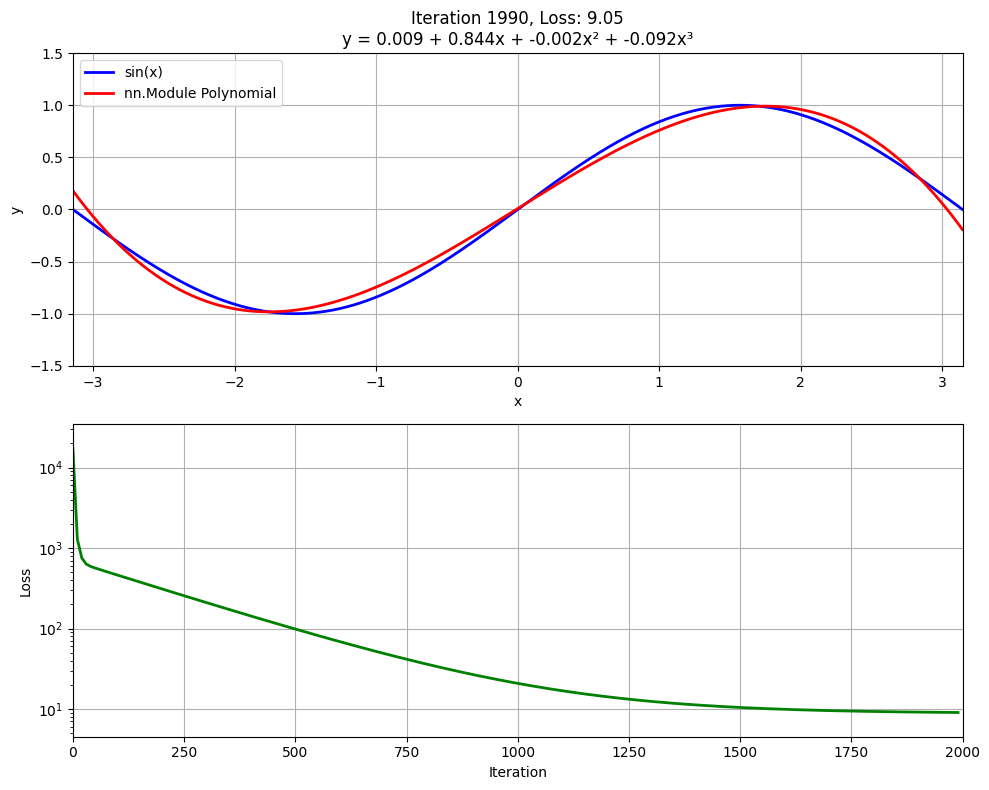

In [ ]:
class Polynomial3(torch.nn.Module):
    """
    Custom PyTorch module for 3rd order polynomial
    y = a + b*x + c*x^2 + d*x^3
    """
    
    def __init__(self, device):
        super().__init__()
        # Task 1 --- BEGIN ---
        self.a = torch.nn.Parameter(torch.randn((), device=device))
        self.b = torch.nn.Parameter(torch.randn((), device=device))
        self.c = torch.nn.Parameter(torch.randn((), device=device))
        self.d = torch.nn.Parameter(torch.randn((), device=device))
        # Task 1 --- END ---
    
    def forward(self, x):
        """Forward pass: compute polynomial evaluation"""
        return self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3
    
    def get_params(self):
        """Get current parameter values as dictionary"""
        return {
            'a': self.a.item(),
            'b': self.b.item(),
            'c': self.c.item(),
            'd': self.d.item()
        }
    
    def string(self):
        """String representation of the polynomial"""
        params = self.get_params()
        return f'y = {params["a"]:.6f} + {params["b"]:.6f}x + {params["c"]:.6f}x² + {params["d"]:.6f}x³'

def version4_nn_module():
    """
    Version 4: Using nn.Module and built-in optimizer
    """
    print("\n=== Version 4 ===")
    
    # Create input and target data
    x = torch.linspace(-math.pi, math.pi, 2000, device=device)
    y_true = torch.sin(x)

    # Task 2 --- BEGIN ---
    model = Polynomial3(device)
    # Task 2 --- END ---
        
    # Task 3 --- BEGIN ---
    criterion = torch.nn.MSELoss(reduction='sum')
    # Task 3 --- END ---

    # Task 4 --- BEGIN ---
    optimizer = torch.optim.SGD(model.parameters(), lr=1e-6)
    # Task 4 --- END ---

    print(f'Initial parameters: {model.get_params()}')
    
    # Don't Remove ME! (History for animation) --- BEGIN ---
    history = []
    save_every = 10
    
    losses = []
    # Don't Remove ME! (History for animation) --- END ---
    
    for t in range(2000):

        # Task 5 --- BEGIN ---
        y_pred = model(x)
        # Task 5 --- END ---        
        
        # Task 6 --- BEGIN ---
        loss = criterion(y_pred, y_true)
        # Task 6 ---- END ---
        
        
        # Don't Remove ME! (Store history for animation) --- BEGIN ---
        losses.append(loss.item())

        if t % save_every == 0:
            history.append({
                'iteration': t,
                'y_pred': y_pred.detach().clone(),
                'loss': loss.item(),
                'params': model.get_params()
            })
        
        if t % 100 == 99:
            print(f'Epoch {t+1:4d}, Loss: {loss.item():.6f}')
        # Don't Remove ME! (Store history for animation) --- END ---

        # Task 7 --- BEGIN ---
        optimizer.zero_grad()  # Clear gradients
        loss.backward()       # Compute gradients
        optimizer.step()      # Update parameters
        # Task 7 --- END ---
            
    final_params = model.get_params()

    # Don't Remove ME! (Final parameter and loss values) --- BEGIN ---
    print(f'\nFinal parameters:')
    print(f'  a = {final_params["a"]:.6f}')
    print(f'  b = {final_params["b"]:.6f}')
    print(f'  c = {final_params["c"]:.6f}')
    print(f'  d = {final_params["d"]:.6f}')
    print(f'Final model: {model.string()}')
    print(f'Final Loss: {losses[-1]:.6f}')
    # Don't Remove ME! (Final parameter and loss values) --- END ---
    
    # --- Animation Part Begins Here ---
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
    
    x_np = x.cpu().numpy()
    y_np = y_true.cpu().numpy()
    
    ax1.plot(x_np, y_np, 'b-', label='sin(x)', linewidth=2)
    line_pred, = ax1.plot([], [], 'r-', label='nn.Module Polynomial', linewidth=2)
    ax1.set_xlim(-math.pi, math.pi)
    ax1.set_ylim(-1.5, 1.5)
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.legend()
    ax1.grid(True)
    title = ax1.set_title('')
    
    loss_line, = ax2.plot([], [], 'g-', linewidth=2)
    ax2.set_xlim(0, 2000)
    
    all_losses = [h['loss'] for h in history]
    min_loss = min(all_losses)
    max_loss = max(all_losses[:10]) if len(all_losses) > 10 else max(all_losses)
    
    if min_loss > 0:
        ax2.set_yscale('log')
        ax2.set_ylim(min_loss * 0.5, max_loss * 2)
    else:
        ax2.set_ylim(0, max_loss * 1.1)
        print("Warning: Loss has non-positive values, using linear scale")
    
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('Loss')
    ax2.grid(True)
    
    iterations_so_far = []
    losses_so_far = []
    
    def init():
        line_pred.set_data([], [])
        loss_line.set_data([], [])
        return line_pred, loss_line, title
    
    def animate(frame):
        h = history[frame]
        
        line_pred.set_data(x_np, h['y_pred'].cpu().numpy())
        
        iterations_so_far.append(h['iteration'])
        losses_so_far.append(h['loss'])
        loss_line.set_data(iterations_so_far, losses_so_far)
        
        params = h['params']
        title.set_text(f"Iteration {h['iteration']}, Loss: {h['loss']:.2f}\n"
                      f"y = {params['a']:.3f} + {params['b']:.3f}x + {params['c']:.3f}x² + {params['d']:.3f}x³")
        
        return line_pred, loss_line, title
    
    anim = FuncAnimation(fig, animate, init_func=init, frames=len(history),
                        interval=50, blit=True, repeat=True)
    
    anim.save('polynomial_training_ver4_nn_module.gif', writer='pillow', fps=20)
    # --- Animation Part Ends Here ---
    
    plt.tight_layout()
    plt.show()
    
    return model, x, y_true, losses

# Run Version 4
model4, x_data4, y_true4, losses4 = version4_nn_module()